# Proof of concept: Isotonic Regression for correcting disparate error in a continuous outcome between two groups
Fairness in Ranking

MaryAnn VanValkenburg

February 5, 2018

## About Isotonic Regression
Isotonic regression is a non-parametric method of fitting a non-decreasing function to data ([see Isotonic Regression](http://scikit-learn.org/stable/modules/isotonic.html)). It is customarily used in probability calibration because it doesn't make assumptions about independence of attributes. It works best when the data follow a non-sigmoid curve and where large amounts of data are available for calibration ([see Probability Calibration](http://scikit-learn.org/stable/modules/calibration.html)).

### Approach 1
Calibration is used to align the posterior probabilities with model predictions. This can be seen with a reliability plot. In this approach, I change the axes of the reliability plot from model predictions and posterior probabilities to predicted score and true score. The scores are normalized to mimic probabilities between 0 and 1.

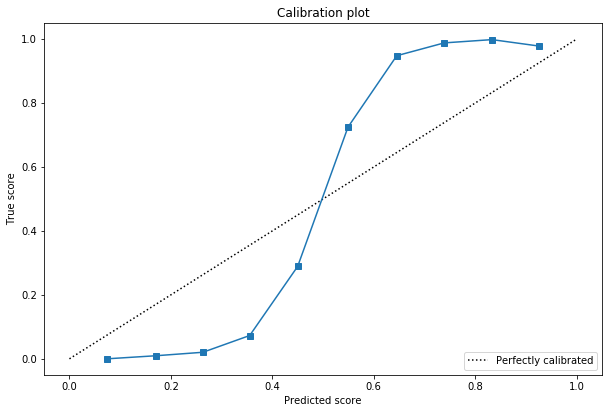

In [11]:
import numpy as np
np.random.seed(0)

import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.svm import LinearSVC
from sklearn.calibration import calibration_curve

X, y = datasets.make_regression(n_samples=100000, n_features=20,
                                    n_informative=2, n_redundant=2)

train_samples = 100  # Samples used for training the models

X_train = X[:train_samples]
X_test = X[train_samples:]
y_train = y[:train_samples]
y_test = y[train_samples:]

# Create classifiers
svc = LinearSVC(C=1.0)


# #############################################################################
# Plot calibration plots

plt.figure(figsize=(10, 10))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)

ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
svc.fit(X_train, y_train)
prob_pos = svc.decision_function(X_test)
prob_pos = (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
true_score, predicted_score = calibration_curve(y_test, prob_pos, n_bins=10)

ax1.plot(predicted_score, true_score, "s-",)


ax1.set_ylabel("True score")
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="lower right")
ax1.set_title('Calibration plot')
ax1.set_xlabel("Predicted score")


In [14]:
#Import statements
from sklearn.isotonic import IsotonicRegression

mus=pd.read_csv("Made_up_states.csv")
mus.set_index('Observation', inplace=True)
mus.head()

,Group,Population_useful,Max_temp_useful,Rand_useless,Model_biased,Truth_0.02Pop0.43Temp
Observation,,,,,,
Alabama,1.00,"4,874,747",110.00,1.90,0.48,0.11
Alaska,2.00,"739,795",100.00,2.45,0.00,0.00
Arizona,1.00,"7,016,270",128.00,3.51,0.51,0.17
Arkansas,2.00,"3,004,279",120.00,4.61,0.04,0.06
California,1.00,"39,536,653",134.00,4.86,1.00,1.00


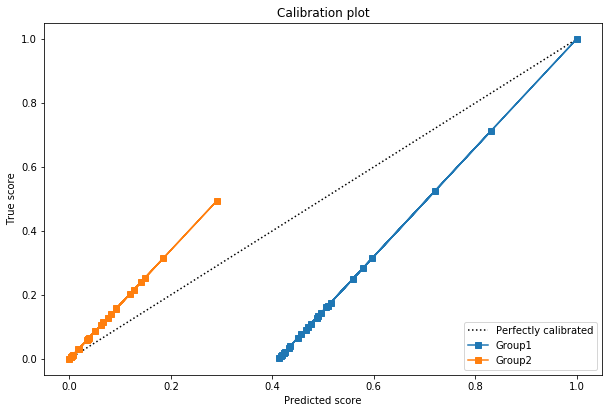

In [22]:
# #############################################################################
# Plot

plt.figure(figsize=(10, 10))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)

ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")

group1 = mus[mus['Group'] < 1.1]
group2 = mus[mus['Group'] > 1.1]

ax1.plot(group1['Model_biased'], group1['Truth_0.02Pop0.43Temp'], "s-", label="Group1")
ax1.plot(group2['Model_biased'], group2['Truth_0.02Pop0.43Temp'], "s-", label="Group2")


ax1.set_ylabel("True score")
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="lower right")
ax1.set_title('Calibration plot')
ax1.set_xlabel("Predicted score")



In [ ]:
#class sklearn.isotonic.IsotonicRegression(y_min=None, y_max=None, increasing=True, out_of_bounds=’nan’)[source]